# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
from scipy.stats.stats import pearsonr

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


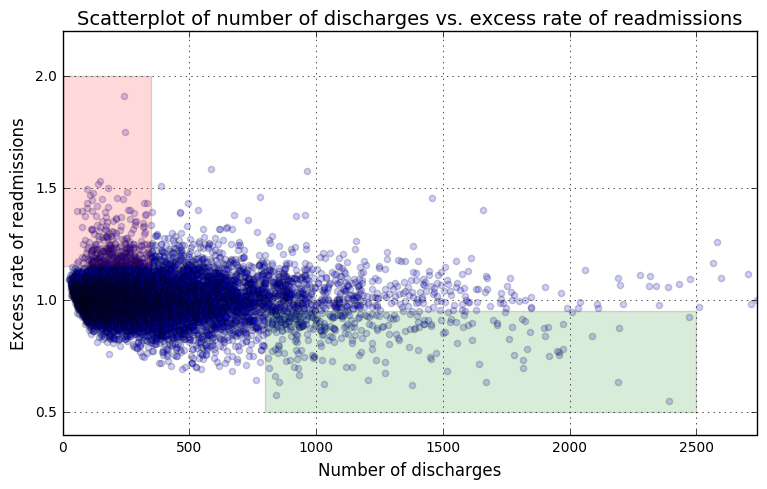

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [5]:
# Your turn

In [6]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


### A. Do you agree with the above analysis and recommendations? Why or why not?

#### A. Initial observations based on the plot above

Since there are no calculations to support the claims in the Initial observations section, we can hardly tell whether readmission rate goes down with increasing number of discharges using the scatter plot above.

#### B. Statistics

For the same reason, We cannot tell whether the mean of readmission rate is different for hospital with capacity > 1000 and < 100 without calculation.

#### C. Conclusions & D. Regulatory policy recommendations

This conclusion cannot be presumed correct unless we run statistical significence tests

In [7]:
clean_hospital_read_df[['Excess Readmission Ratio', 'Number of Discharges']].describe()

,Excess Readmission Ratio,Number of Discharges
count,11497.000000,11578.000000
mean,1.007504,362.909397
std,0.091964,309.176945
min,0.549500,0.000000
25%,0.952600,157.000000
50%,1.003500,280.000000
75%,1.058100,472.750000
max,1.909500,6793.000000


In [8]:
# let us do some data cleansing by removing records with zero discharges

hos = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] != 0)]

# Create a neat dataframe for calculations
hos = hos[['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate', 'Expected Readmission Rate','Number of Readmissions']]
hos.columns = ['disch', 'rratio', 'prradmrate', 'exradmrate', 'noradm']
hos_no = len(hos)
print("no. of hospitals: " + str(hos_no))
hos.head()

no. of hospitals: 11497


,disch,rratio,prradmrate,exradmrate,noradm
1832,25,1.0914,26.8,24.6,12.0
1699,27,1.0961,24.8,22.6,12.0
1774,28,1.0934,24.4,22.3,12.0
1853,29,1.0908,21.0,19.3,11.0
1290,30,1.1123,23.2,20.9,13.0


In [9]:
# hospitals with number of discharges < 100

hos_lt100_dischs = hos[hos.disch < 100]
hos_lt100_dischs_no = len(hos_lt100_dischs)
hos_lt100_dischs_mean = hos_lt100_dischs.rratio.mean()
hos_lt100_dischs_rratio_gt1_pct = len(hos_lt100_dischs[hos_lt100_dischs.rratio > 1])*100 / len(hos_lt100_dischs)
hos_lt100_dischs_rratio_gt1_pct

print('No of hospitals with number of discharges < 100 is: ' + str(hos_lt100_dischs_no))
print('In hospitals with number of discharges < 100, mean excess readmission rate is: ' + str(hos_lt100_dischs_mean))
print('The percentage of hospitals with excess readmission rate greater than 1 is: ' + str(hos_lt100_dischs_rratio_gt1_pct))

No of hospitals with number of discharges < 100 is: 1188
In hospitals with number of discharges < 100, mean excess readmission rate is: 1.0226183501683506
The percentage of hospitals with excess readmission rate greater than 1 is: 63.215488215488215


In [10]:
# hospitals with number of discharges > 1000

hos_gt1000_dischs = hos[hos.disch > 1000]
hos_gt1000_dischs_no = len(hos_gt1000_dischs)
hos_gt1000_dischs_mean = hos_gt1000_dischs.rratio.mean()
hos_gt1000_dischs_rratio_gt1_pct = len(hos_gt1000_dischs[hos_gt1000_dischs.rratio > 1])*100 / len(hos_gt1000_dischs)
hos_gt1000_dischs_rratio_gt1_pct

print('No of hospitals with number of discharges > 1000 is: ' + str(hos_gt1000_dischs_no))
print('In hospitals with number of discharges > 1000, mean excess readmission rate is: ' + str(hos_gt1000_dischs_mean))
print('The percentage of hospitals with excess readmission rate greater than 1 is: ' + str(hos_gt1000_dischs_rratio_gt1_pct))

No of hospitals with number of discharges > 1000 is: 463
In hospitals with number of discharges > 1000, mean excess readmission rate is: 0.9783354211663071
The percentage of hospitals with excess readmission rate greater than 1 is: 44.49244060475162


#### From the above calculations, the statistics provided in Section B are correct.

In [11]:

stats.ttest_ind(hos_lt100_dischs.rratio,hos_gt1000_dischs.rratio)

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)

#### With such a small p-value (<0.01), we reject the null hypothesis of equal means, and conclude that the difference between the two groups means is statistically significant.

In [12]:
# calculate correlation between discharges and re-admition ratio
pearsonr(hos.disch, hos.rratio)

(-0.097397943510793533, 1.222547377680967e-25)

In [13]:
# calculate correlation between discharges and predicted re-admition rate
pearsonr(hos.disch, hos.prradmrate)

(-0.13516277105208452, 5.1975474319650993e-48)

In [14]:
# calculate correlation between discharges and expected re-admition rate
pearsonr(hos.disch, hos.exradmrate)

(-0.13109068110461916, 3.0485714146850061e-45)

#### The above calculations shows small correlation coefficients with very tiny p-value.  The p-value is less than the significance level of 0.05, then we can conclude that correlation is statistically significant between hospital capacity (number of discharges) and readmission rates.

Let us consider the reccomendation that hospitals with < 300 discharges should be treated differently than hospitals with >= 300 discharges. This requires hypothesis testing for the difference between two sample proportions: Small Hospitals (discharges < 300) and Large Hospitals (discharges >= 300).

The Null Hypothesis: The proportion of hospitals with an excess readmission rate greater than one is equal in both the small hospitals and the large hospitals

The Alternate Hypothesis: The proportion of hospitals with an excess readmission rate greater than one is not equal between small hospitals and the large hospitals.



In [15]:
hos_lt300_dischs = hos[hos.disch <  300]
hos_gt300_dischs = hos[hos.disch >= 300]

print('\nMean readmissions ratio for hospotals with discharges less than 300 is: ' + str(hos_lt300_dischs.rratio.mean()))
print('Mean readmissions ratio for hospotals with discharges greater than 300 is: ' + str(hos_gt300_dischs.rratio.mean()))

stats.ttest_ind(hos_lt300_dischs.rratio, hos_gt300_dischs.rratio)



Mean readmissions ratio for hospotals with discharges less than 300 is: 1.0142382121807445
Mean readmissions ratio for hospotals with discharges greater than 300 is: 0.9998708480237513


Ttest_indResult(statistic=8.384446244560591, pvalue=5.6895380893335379e-17)

#### With this small p-value we reject the null hypothesis and accept the alternate hypothesis

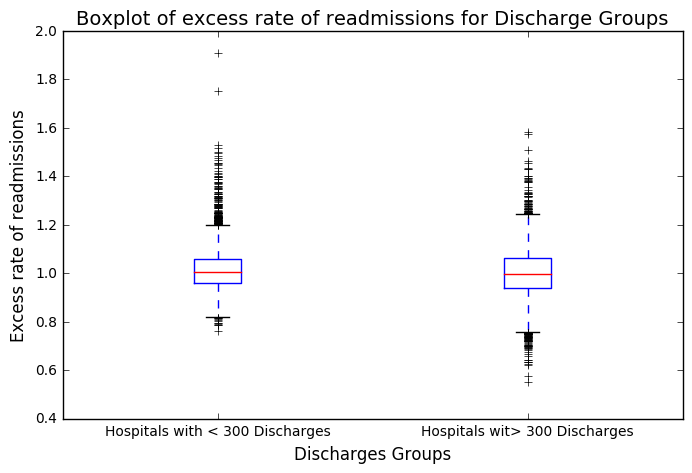

In [16]:
fig, ax = plt.subplots(figsize=(8,5))

ax.boxplot([hos_lt300_dischs.rratio, hos_gt300_dischs.rratio], labels=['Hospitals with < 300 Discharges', 'Hospitals wit> 300 Discharges'])
ax.set_xlabel('Discharges Groups', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Boxplot of excess rate of readmissions for Discharge Groups', fontsize=14)

#### That difference may not be of practical significance for the purposes of designing regulatory measures. Before imposing strict regulations, some other factors should be included in the analysis regading why small hospitals has this higher readmission rates (cofounding factors).

#### What are the advantages and disadvantages of using this plot to convey information?
Advantages:
*  Easy to show the relation between two variables.  
*  Indicate coloured areas of focus.  
Disadvantages:
*  Need to be supported by other type of plots to get better conclusions.  
*  Coloured areas (green and red) have focus different from the analysis done on the report.  


A better graph may be line plot:

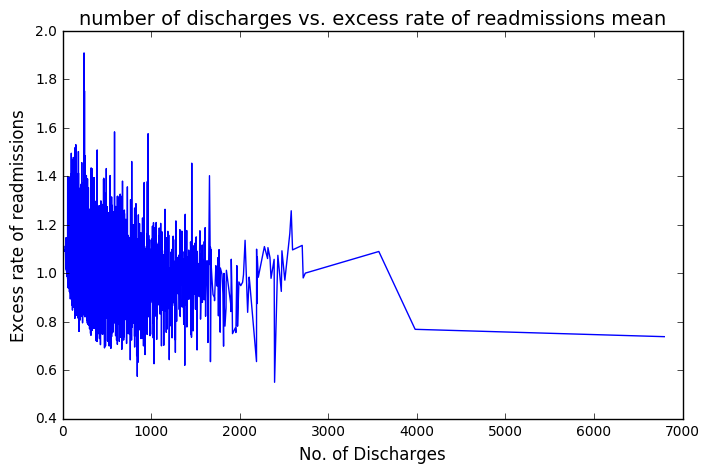

In [17]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(hos.disch, hos.rratio)
ax.set_xlabel('No. of Discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('number of discharges vs. excess rate of readmissions mean', fontsize=14)

We can focus on the section of hospitals with less than 2000 discharges and smooth the curve using the mean of ranges:

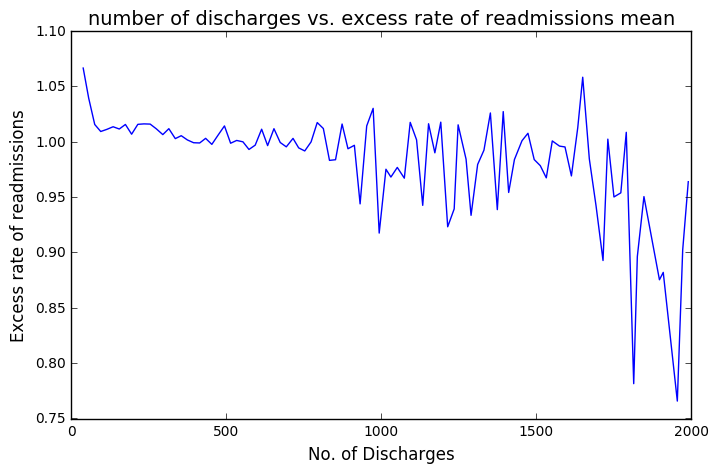

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

hos_small= hos[hos.disch<2000]

bins = np.linspace(hos_small.disch.min(),2000, 100)
groups = hos_small.groupby(np.digitize(hos_small.disch, bins))

ax.plot(groups.aggregate(lambda x: np.mean(x))['disch'], list(groups.aggregate(lambda x: np.mean(x))['rratio']))
ax.set_xlabel('No. of Discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('number of discharges vs. excess rate of readmissions mean', fontsize=14)


Also, removing outliers may produce a better curve.